# Assignment 6
1. Use yeast dataset from UCI http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data
2. Remove the first column and use the last column as the target
3. Only leave CYT and VAC classes
4. Replace [0.3, 0.5, 0.7] in feature 2 to null
5. Replace [0.26, 0.36, 0.64] in feature 3 to null
6. Split the data

7. Impute the data (or not, it's your call)
8. Build a outlier detection model to classify VAC from CYT, i.e. 0 from 1
9. Build a classifer using sample augmentation techniques to flassify VAC from CYT, i.e. 0 from 1
10. Try different methods and hyper paramters

11. Report perfromance using F-1 score

Link to GitHub: https://github.com/alintu/Assignments/tree/master/MLPP

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=Warning) 

In [2]:
df = pd.read_fwf('http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [3]:
df.drop(columns=[0], axis=1, inplace=True)

In [4]:
df

,1,2,3,4,5,6,7,8,9
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [5]:
df[9].unique()

array(['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX',
       'ERL'], dtype=object)

In [6]:
#leave only needed classes

values = ['CYT', 'VAC']
df = df[df[9].isin(values) == True]
df[9].unique()

array(['CYT', 'VAC'], dtype=object)

In [7]:
df[2].unique()

array([0.4 , 0.39, 0.42, 0.44, 0.63, 0.53, 0.45, 0.47, 0.61, 0.36, 0.57,
       0.48, 0.59, 0.56, 0.62, 0.49, 0.46, 0.54, 0.51, 0.52, 0.35, 0.65,
       0.6 , 0.64, 0.5 , 0.32, 0.55, 0.43, 0.41, 0.34, 0.38, 0.66, 0.27,
       0.26, 0.68, 0.58, 0.33, 0.3 , 0.25, 0.37, 0.82, 0.69, 0.7 , 0.22,
       0.21, 0.71, 0.78, 0.31, 0.29, 0.76, 0.28])

In [8]:
df[3].unique()

array([0.56, 0.6 , 0.57, 0.52, 0.5 , 0.48, 0.42, 0.53, 0.61, 0.51, 0.58,
       0.49, 0.44, 0.45, 0.55, 0.59, 0.62, 0.54, 0.71, 0.69, 0.46, 0.75,
       0.38, 0.47, 0.41, 0.63, 0.43, 0.4 , 0.39, 0.26, 0.33, 0.64, 0.67,
       0.65, 0.79, 1.  , 0.32, 0.35, 0.66])

In [9]:
#replace required values with nan

df[[2]] = df[[2]].replace([0.3, 0.5, 0.7], np.nan)
df[[3]] = df[[3]].replace([0.26, 0.36, 0.64], np.nan)

In [10]:
df[2].unique()

array([0.4 , 0.39, 0.42, 0.44, 0.63, 0.53, 0.45, 0.47, 0.61, 0.36, 0.57,
       0.48, 0.59, 0.56, 0.62, 0.49, 0.46, 0.54, 0.51, 0.52, 0.35, 0.65,
       0.6 , 0.64,  nan, 0.32, 0.55, 0.43, 0.41, 0.34, 0.38, 0.66, 0.27,
       0.26, 0.68, 0.58, 0.33, 0.25, 0.37, 0.82, 0.69, 0.22, 0.21, 0.71,
       0.78, 0.31, 0.29, 0.76, 0.28])

In [11]:
df[3].unique()

array([0.56, 0.6 , 0.57, 0.52, 0.5 , 0.48, 0.42, 0.53, 0.61, 0.51, 0.58,
       0.49, 0.44, 0.45, 0.55, 0.59, 0.62, 0.54, 0.71, 0.69, 0.46, 0.75,
       0.38, 0.47, 0.41, 0.63, 0.43, 0.4 , 0.39,  nan, 0.33, 0.67, 0.65,
       0.79, 1.  , 0.32, 0.35, 0.66])

In [12]:
df.head(20)

,1,2,3,4,5,6,7,8,9
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
9,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT
12,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,CYT
15,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,CYT
16,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,CYT
20,0.45,0.40,0.50,0.16,0.5,0.0,0.50,0.22,CYT
21,0.43,0.44,0.48,0.22,0.5,0.0,0.51,0.22,CYT
22,0.73,0.63,0.42,0.30,0.5,0.0,0.49,0.22,CYT
23,0.43,0.53,0.52,0.13,0.5,0.0,0.55,0.22,CYT
24,0.46,0.53,0.52,0.15,0.5,0.0,0.58,0.22,CYT


In [13]:
#add extra column with 0 and 1 classes for column 9

df['9_code'] = np.where(df[9].str.contains('CYT'), 1, 0)

In [14]:
df.head(20)

,1,2,3,4,5,6,7,8,9,9_code
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT,1
9,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT,1
12,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,CYT,1
15,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,CYT,1
16,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,CYT,1
20,0.45,0.40,0.50,0.16,0.5,0.0,0.50,0.22,CYT,1
21,0.43,0.44,0.48,0.22,0.5,0.0,0.51,0.22,CYT,1
22,0.73,0.63,0.42,0.30,0.5,0.0,0.49,0.22,CYT,1
23,0.43,0.53,0.52,0.13,0.5,0.0,0.55,0.22,CYT,1
24,0.46,0.53,0.52,0.15,0.5,0.0,0.58,0.22,CYT,1


In [15]:
#define features and target

X = df.iloc[:,:8]
y = df['9_code']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [17]:
#impute missing values
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

### Outliner detection models

#### DBSCAN

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import f1_score

dbscan = DBSCAN(eps = 0.3, min_samples = 20)
y_pred_train = dbscan.fit_predict(X_train)
y_pred_test = dbscan.fit_predict(X_test)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test, y_pred_test, average='micro')))

Train set F-1 score: 0.060
Test set F-1 score: 0.065


#### Local Oulier Factor

In [19]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=100, contamination=.5)
y_pred_train = lof.fit_predict(X_train)
y_pred_test = lof.fit_predict(X_test)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test, y_pred_test, average='micro')))


Train set F-1 score: 0.474
Test set F-1 score: 0.484


In [20]:
lof = LocalOutlierFactor(n_neighbors=100, contamination=.01)
y_pred_train = lof.fit_predict(X_train)
y_pred_test = lof.fit_predict(X_test)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test, y_pred_test, average='micro')))

Train set F-1 score: 0.930
Test set F-1 score: 0.919


In [21]:
lof = LocalOutlierFactor(n_neighbors=100, contamination=.001)
y_pred_train = lof.fit_predict(X_train)
y_pred_test = lof.fit_predict(X_test)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test, y_pred_test, average='micro')))

Train set F-1 score: 0.940
Test set F-1 score: 0.927


#### Elliptic Envelope

In [22]:
from sklearn.covariance import EllipticEnvelope

elenv = EllipticEnvelope(contamination=.1)
y_pred_train = elenv.fit_predict(X_train)
y_pred_test = elenv.fit_predict(X_test)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test, y_pred_test, average='micro')))

Train set F-1 score: 0.843
Test set F-1 score: 0.839


In [23]:
elenv = EllipticEnvelope(contamination=.01)
y_pred_train = elenv.fit_predict(X_train)
y_pred_test = elenv.fit_predict(X_test)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test, y_pred_test, average='micro')))

Train set F-1 score: 0.930
Test set F-1 score: 0.919


#### One-Class SVM

In [24]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='poly', gamma=0.001, nu=0.03)
y_pred_train = svm.fit_predict(X_train)
y_pred_test = svm.fit_predict(X_test)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test, y_pred_test, average='micro')))

Train set F-1 score: 0.095
Test set F-1 score: 0.355


In [25]:
svm = OneClassSVM(kernel='linear', gamma=0.001, nu=0.03)
y_pred_train = svm.fit_predict(X_train)
y_pred_test = svm.fit_predict(X_test)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test, y_pred_test, average='micro')))

Train set F-1 score: 0.921
Test set F-1 score: 0.903


In [26]:
svm = OneClassSVM(kernel='linear', gamma=0.001, nu=0.001)
y_pred_train = svm.fit_predict(X_train)
y_pred_test = svm.fit_predict(X_test)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test, y_pred_test, average='micro')))



Train set F-1 score: 0.938
Test set F-1 score: 0.935


### Sample augmentation classifier

In [27]:
color = ['green','orange']

target_count = df['9_code'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 30
Class 1: 463
Proportion: 0.06 : 1


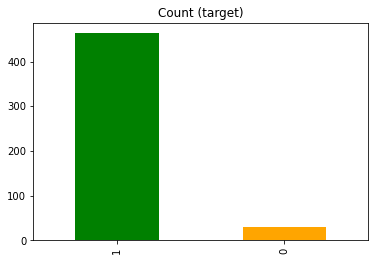

In [28]:
target_count.plot(kind='bar', title='Count (target)', color = color);

In [29]:
import matplotlib.pyplot as plt

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

#### Random under-sampling with imbalanced learn

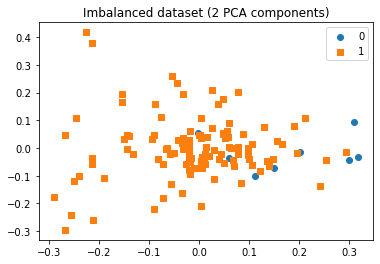

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

plot_2d_space(X_test_pca, y_test, 'Imbalanced dataset (2 PCA components)')

In [31]:
! pip install imblearn

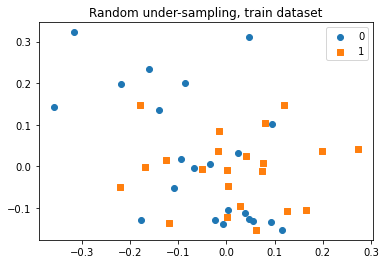

In [32]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train_pca, y_train)
X_test_rus, y_test_rus = rus.fit_resample(X_test_pca, y_test)

plot_2d_space(X_train_rus, y_train_rus, 'Random under-sampling, train dataset')

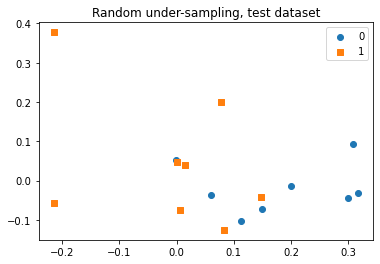

In [33]:
plot_2d_space(X_test_rus, y_test_rus, 'Random under-sampling, test dataset')

In [34]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train_rus, y_train_rus)
y_pred_train = lg.predict(X_train_rus)
y_pred_test = lg.predict(X_test_rus)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train_rus, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test_rus, y_pred_test, average='micro')))

Train set F-1 score: 0.591
Test set F-1 score: 0.375


#### Random over-sampling with imbalanced learn

325 new random picked points


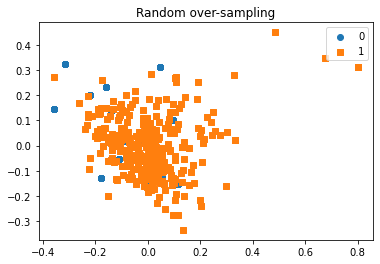

In [35]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_pca, y_train)
X_test_ros, y_test_ros = ros.fit_resample(X_test_pca, y_test)

print(X_train_ros.shape[0] - X_train.shape[0], 'new random picked points')

plot_2d_space(X_train_ros, y_train_ros, 'Random over-sampling')

108 new random picked points


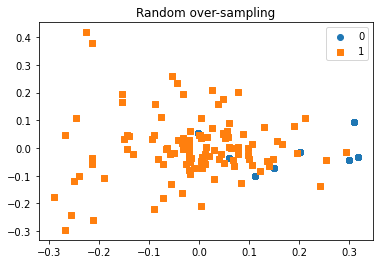

In [36]:
print(X_test_ros.shape[0] - X_test.shape[0], 'new random picked points')
plot_2d_space(X_test_ros, y_test_ros, 'Random over-sampling')

In [37]:
lg.fit(X_train_ros, y_train_ros)
y_pred_train = lg.predict(X_train_ros)
y_pred_test = lg.predict(X_test_ros)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train_ros, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test_ros, y_pred_test, average='micro')))

Train set F-1 score: 0.576
Test set F-1 score: 0.319


#### Under-sampling: Tomek links

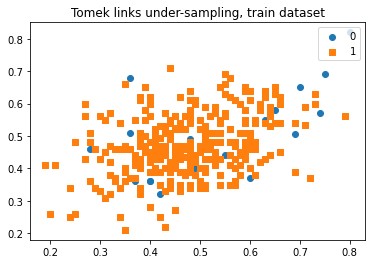

In [38]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)
X_test_tl, y_test_tl = tl.fit_resample(X_test, y_test)
plot_2d_space(X_train_tl, y_train_tl, 'Tomek links under-sampling, train dataset')

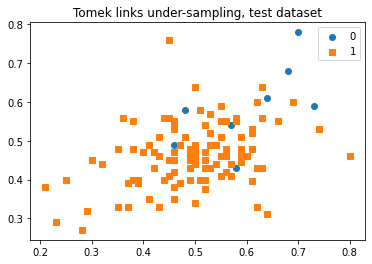

In [39]:
plot_2d_space(X_test_tl, y_test_tl, 'Tomek links under-sampling, test dataset')

In [40]:
lg.fit(X_train_tl, y_train_tl)
y_pred_train = lg.predict(X_train_tl)
y_pred_test = lg.predict(X_test_tl)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train_tl, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test_tl, y_pred_test, average='micro')))

Train set F-1 score: 0.939
Test set F-1 score: 0.934


#### Under-sampling: Cluster centroids

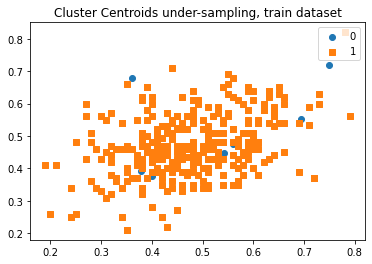

In [41]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy ={0: 7})
X_train_cc, y_train_cc = cc.fit_resample(X_train, y_train)
X_test_cc, y_test_cc = cc.fit_resample(X_test, y_test)

plot_2d_space(X_train_cc, y_train_cc, 'Cluster Centroids under-sampling, train dataset')

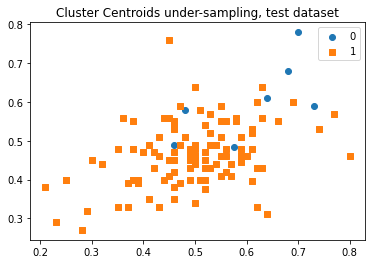

In [42]:
plot_2d_space(X_test_cc, y_test_cc, 'Cluster Centroids under-sampling, test dataset')

In [43]:
lg.fit(X_train_cc, y_train_cc)
y_pred_train = lg.predict(X_train_cc)
y_pred_test = lg.predict(X_test_cc)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train_cc, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test_cc, y_pred_test, average='micro')))

Train set F-1 score: 0.980
Test set F-1 score: 0.943


#### Over-sampling: SMOTE

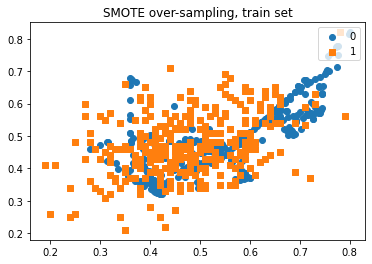

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = smote.fit_resample(X_test, y_test)

plot_2d_space(X_train_sm, y_train_sm, 'SMOTE over-sampling, train set')

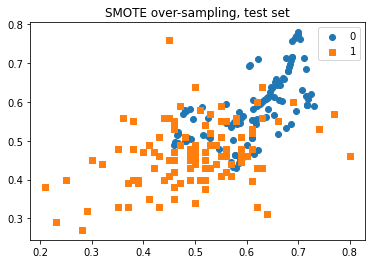

In [45]:
plot_2d_space(X_test_sm, y_test_sm, 'SMOTE over-sampling, test set')

In [46]:
lg.fit(X_train_sm, y_train_sm)
y_pred_train = lg.predict(X_train_sm)
y_pred_test = lg.predict(X_test_sm)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train_sm, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test_sm, y_pred_test, average='micro')))

Train set F-1 score: 0.709
Test set F-1 score: 0.741


#### Over-sampling followed by under-sampling

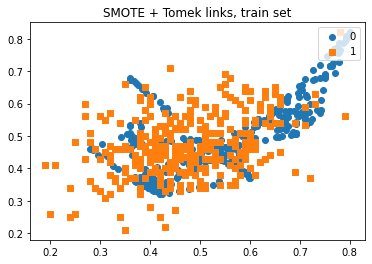

In [47]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
X_test_smt, y_test_smt = smt.fit_resample(X_test, y_test)

plot_2d_space(X_train_smt, y_train_smt, 'SMOTE + Tomek links, train set')

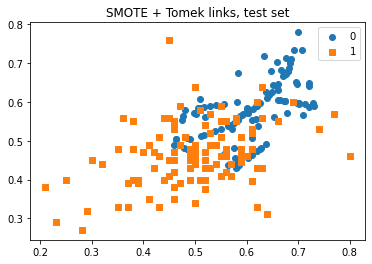

In [48]:
plot_2d_space(X_test_smt, y_test_smt, 'SMOTE + Tomek links, test set')

In [49]:
lg.fit(X_train_smt, y_train_smt)
y_pred_train = lg.predict(X_train_smt)
y_pred_test = lg.predict(X_test_smt)
print("Train set F-1 score: {:.3f}".format(f1_score(y_train_smt, y_pred_train, average='micro')))
print("Test set F-1 score: {:.3f}".format(f1_score(y_test_smt, y_pred_test, average='micro')))

Train set F-1 score: 0.679
Test set F-1 score: 0.746
